<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Keep part in this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

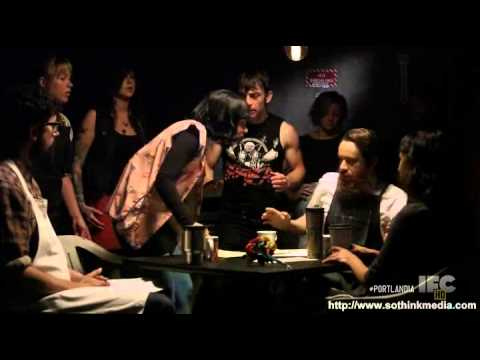

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'/Users/elliotgunn/Desktop/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [23]:
import pandas as pd

url = "./data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [8]:
shops.star_rating.value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

'5.0 star rating'

'50'

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


'1 check-in Love love loved the atm'

In [59]:
def wrangle(df):
    
    X = df.copy()
    
    # review text only
    X['review_text'] = X['full_review_text'].apply(lambda x: " ".join(x.split()[1:]))
    
    # extract date
    X['date'] = X['full_review_text'].apply(lambda x: x.split()[0])
    
    # convert date to datetime format
    X['date'] = pd.to_datetime(X['date'], infer_datetime_format=True)
    # extract components
    X['year'] = X['date'].dt.year
    X['month'] = X['date'].dt.month
    X['day'] = X['date'].dt.day
    
    # star rating digits only
    X['stars'] = X['star_rating'].apply(lambda x: x.split()[0])
    
    X = X.drop(columns=["full_review_text", "date", "star_rating"])
    
    return X
    
shops_clean = wrangle(shops)
shops_clean.head()

,coffee_shop_name,review_text,year,month,day,stars
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,2016,11,25,5.0
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",2016,12,2,4.0
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,2016,11,30,4.0
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2016,11,25,2.0
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,2016,12,3,4.0


,coffee_shop_name,full_review_text,star_rating,stars,date,year,month,day,review
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,4,2016-11-25,2016,11,25,NaN
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,2016-11-25,2016,11,25,"12/2/2016 Listed in Date Night: Austin, Ambia..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,2016-11-25,2016,11,25,11/30/2016 1 check-in Listed in Brunch Spots ...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,4,2016-11-25,2016,11,25,11/25/2016 Very cool decor! Good drinks Nice ...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,2016-11-25,2016,11,25,12/3/2016 1 check-in They are located within ...


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

### Overall word/token count

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [ ]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    tokens = tokens.lower().split()
    
    return tokens

In [ ]:
# overall word count

from collections import Counter

word_counts = Counter()

shops_clean['tokens'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

#### Lemmatization

- transforms a word into its base form called a lemma
- e.g. plurals get transformed to singular tense
- computationally costly

In [72]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas



In [75]:
shops_clean['tokens'] = shops_clean['review_text'].apply(get_lemmas)
shops_clean['tokens'].head()

0    [1, check, love, love, love, atmosphere, every...
1    [list, date, night, austin, ambiance, austin, ...
2    [1, check, listed, brunch, spots, love, eclect...
3    [very, cool, decor, good, drink, nice, seating...
4    [1, check, locate, northcross, mall, shopping,...
Name: tokens, dtype: object

In [77]:
from collections import Counter

def count(docs):
        '''
        This function takes documents and 
        returns a dataframe of word counts
        for analysis.
        
        '''

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [83]:
# top 5 words
wc = count(shops_clean['tokens'])
wc.head(5)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
24,coffee,4953,10751,1.0,0.026478,0.026478,0.650341
141,be,3657,7936,2.0,0.019545,0.046023,0.480173
70,the,3945,6915,3.0,0.017030,0.063053,0.517988
119,place,3885,6041,4.0,0.014878,0.077931,0.510110
164,good,3816,5931,5.0,0.014607,0.092538,0.501050


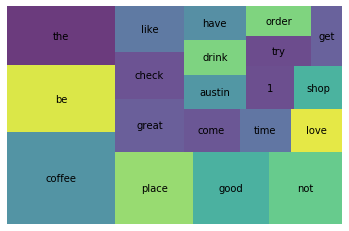

In [88]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### View counts by rating

In [104]:
# look at shops with ratings 1-3

shops_clean['stars'] = shops_clean['stars'].astype(float)

# create mask and verify
mask_bad = shops_clean['stars'] < 4.0
shops_clean[mask_bad].stars.value_counts()

3.0    738
2.0    460
1.0    278
Name: stars, dtype: int64

In [106]:
wc_bad = count(shops_clean[mask_bad]['tokens'])
wc_bad.head(5)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
23,coffee,951,2208,1.0,0.024660,0.024660,0.644309
114,not,931,1878,2.0,0.020974,0.045634,0.630759
160,be,776,1743,3.0,0.019467,0.065101,0.525745
56,the,811,1481,4.0,0.016540,0.081641,0.549458
26,place,755,1231,5.0,0.013748,0.095390,0.511518


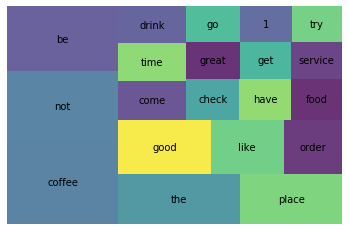

In [107]:
# words most popularly used for bad coffee shops
wc_top20_bad = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_top20_bad['pct_total'], label=wc_top20_bad['word'], alpha=.8 )
plt.axis('off')
plt.show()

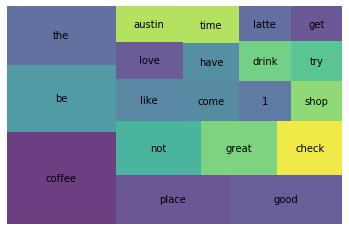

In [108]:
# look at shops with ratings 4 or 5

mask_good = shops_clean['stars'] > 3.0
wc_good = count(shops_clean[mask_good]['tokens'])

wc_top20_good = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_top20_good['pct_total'], label=wc_top20_good['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [128]:
# we need the 'appears_in_pct' from the good and bad tables
# create a dataframe with 'word', 'appears_in_pct_good', 'appears_in_pct_bad'

# merge wc_good, wc_bad
df = pd.merge(wc_good, wc_bad, on='word')
df.head()

,word,appears_in_x,count_x,rank_x,pct_total_x,cul_pct_total_x,appears_in_pct_x,appears_in_y,count_y,rank_y,pct_total_y,cul_pct_total_y,appears_in_pct_y
0,coffee,4002,8543,1.0,0.026992,0.026992,0.651792,951,2208,1.0,0.024660,0.024660,0.644309
1,be,2881,6193,2.0,0.019567,0.046559,0.469218,776,1743,3.0,0.019467,0.065101,0.525745
2,the,3134,5434,3.0,0.017169,0.063728,0.510423,811,1481,4.0,0.016540,0.081641,0.549458
3,place,3130,4810,4.0,0.015197,0.078926,0.509772,755,1231,5.0,0.013748,0.095390,0.511518
4,good,3102,4731,5.0,0.014948,0.093873,0.505212,714,1200,6.0,0.013402,0.108792,0.483740


In [129]:
df = df.iloc[:, [0, 6, 12]]
df.head()

,word,appears_in_pct_x,appears_in_pct_y
0,coffee,0.651792,0.644309
1,be,0.469218,0.525745
2,the,0.510423,0.549458
3,place,0.509772,0.511518
4,good,0.505212,0.483740


In [130]:
df = df.rename(columns={'appears_in_pct_x': "appears_in_pct_good", 'appears_in_pct_y': "appears_in_pct_bad"})
df.head()

,word,appears_in_pct_good,appears_in_pct_bad
0,coffee,0.651792,0.644309
1,be,0.469218,0.525745
2,the,0.510423,0.549458
3,place,0.509772,0.511518
4,good,0.505212,0.483740


In [134]:
# Only look at the top 5-10 words with the greatest differences

df['differences'] = abs(df['appears_in_pct_good'] - df['appears_in_pct_bad'])
df.head()

,word,appears_in_pct_good,appears_in_pct_bad,differences
0,coffee,0.651792,0.644309,0.007483
1,be,0.469218,0.525745,0.056527
2,the,0.510423,0.549458,0.039035
3,place,0.509772,0.511518,0.001746
4,good,0.505212,0.483740,0.021472


In [136]:
# top 10 by differences
df.sort_values(by='differences', ascending=False)

,word,appears_in_pct_good,appears_in_pct_bad,differences
5,not,0.390879,0.630759,0.239879
6,great,0.408958,0.235772,0.173185
28,delicious,0.192182,0.057588,0.134594
8,like,0.273290,0.403794,0.130504
27,order,0.164821,0.291328,0.126507
9,love,0.262378,0.141599,0.120779
21,friendly,0.235505,0.127371,0.108134
7,check,0.437459,0.331301,0.106158
158,ask,0.050651,0.149051,0.098400
224,bad,0.038111,0.133469,0.095358


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play the the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

